# Eliminando ruido mediante filtros

In [35]:
import os
import cv2
import cv2
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files


## Algunas funcines de apoyo

In [36]:
def subir_imagen():
    # Pedir al usuario que seleccione un archivo
    uploaded = files.upload()

    # Obtener el nombre del archivo y su contenido
    file_name = next(iter(uploaded))
    file_content = uploaded[file_name]

    # Definir el directorio donde se almacenará el archivo (en Google Colab)
    target_dir = '/content/imagenes'
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    # Almacenar el archivo en el directorio especificado
    file_path = os.path.join(target_dir, file_name)
    with open(file_path, 'wb') as f:
        f.write(file_content)

    return file_path


In [37]:
def leer_imagen(path):
    # Leer la imagen utilizando OpenCV
    image = cv2.imread(path)
    if image is None:
       raise ValueError("No se pudo leer la imagen. Asegúrate de que la ruta sea correcta y la imagen exista.")
    return image

## Cargando una imagen

❗La imagen que cargemos será la usada en el resto del *notebook*.

Saving Captura de pantalla de 2018-11-12 21-01-49.png to Captura de pantalla de 2018-11-12 21-01-49 (1).png


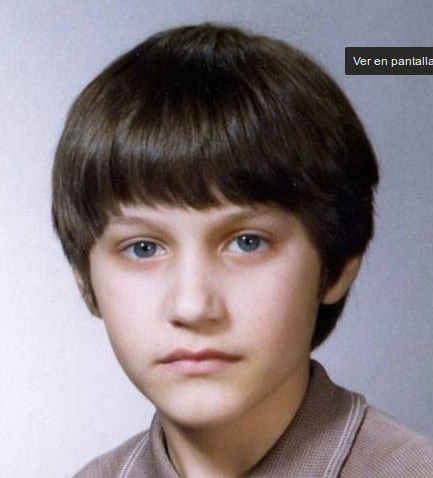

In [38]:
# Llamar a la función para pedir el archivo y obtener el path almacenado
ruta = subir_imagen()

imagen = leer_imagen(ruta)

# Mostrar la imagen original
cv2_imshow(imagen)

## Usando filtros

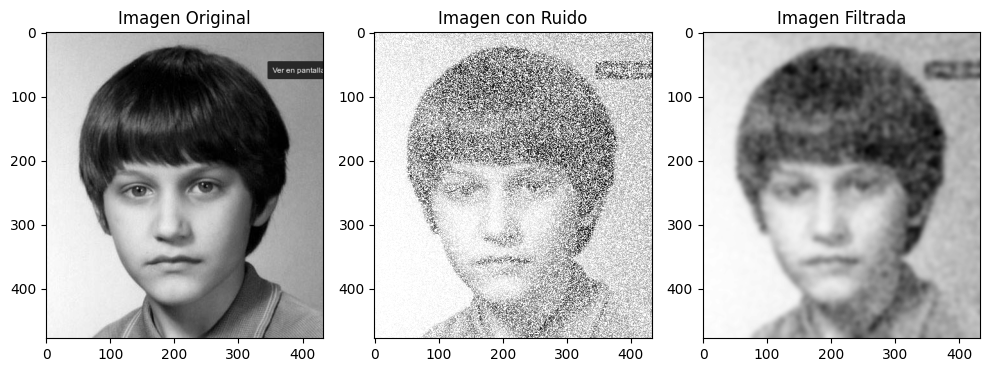

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB);
imagen_bw  = cv2.cvtColor(imagen_rgb, cv2.COLOR_BGR2GRAY)

# Agregar ruido a la imagen (simulación)
noise = np.random.normal(0, 25, imagen_bw.shape).astype(np.uint8)
imagen_con_ruido = cv2.add(imagen_bw, noise)

filtered_image = imagen_con_ruido.copy();

# Aplicar filtro de suavizado (blur) para reducir el ruido
for _ in range(10):
    filtered_image = cv2.GaussianBlur(filtered_image, (5, 5), 0)

filtered_image = cv2.bilateralFilter(filtered_image, d=9, sigmaColor=75, sigmaSpace=75)

# Mostrar la imagen original con ruido y la filtrada
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.imshow(imagen_bw, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 3, 2)
plt.imshow(imagen_con_ruido, cmap='gray')
plt.title('Imagen con Ruido')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title('Imagen Filtrada')

plt.tight_layout()
plt.show()


## Mejorando el contraste

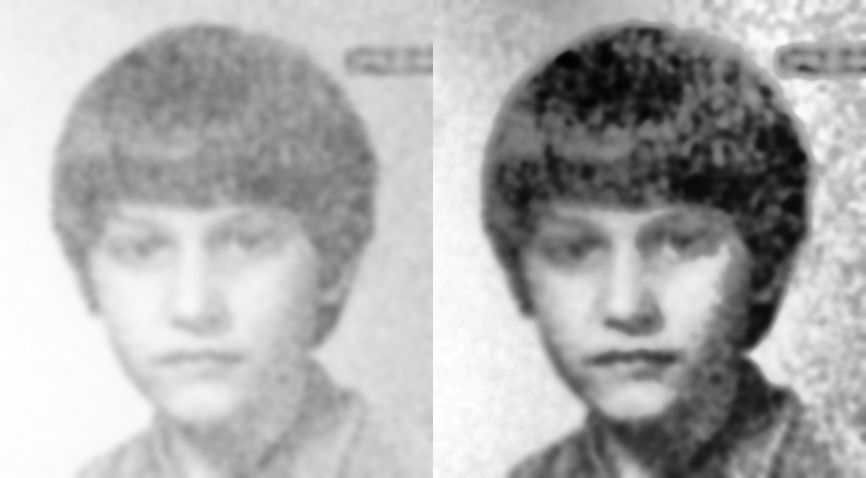

In [54]:
# Applying CLAHE to L-channel
# feel free to try different values for the limit and grid size:
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(2,2))
cl = clahe.apply(filtered_image)

# Converting image from LAB Color model to BGR color spcae
enhanced_img = cl

# Stacking the original image with the enhanced image
result = np.hstack((filtered_image, enhanced_img))
cv2_imshow(result)